# Neural Networks (LTAT.02.001) project

Topic: Predict if the bus is leaving the bus stop

Team members: Märt Häkkinen, Anne Ott, Linnet Puskar, Liis Simmul

In [1]:
import os
import cv2
import numpy as np
import PIL
from keras.preprocessing.image import img_to_array, array_to_img

from PIL import Image
from load_dataset import load_dataset

Using TensorFlow backend.


Working with 567 sets of images
Working with 6793 images
Image examples: 


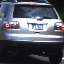

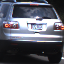

In [2]:
from load_dataset import load_dataset

X_train, Y_train, image_count = load_dataset()

print("Working with {0} sets of images".format(len(X_train)))
print("Working with {0} images".format(image_count))
print("Image examples: ")

for i in range(0, 2):
    image = X_train[0][i]
    image = array_to_img(image, data_format=None, scale=True, dtype=None)
    display(image)

Reading reference image :  images/book1.jpg
Reading image to align :  images/book2.jpg
Aligning images ...
Saving aligned image :  images/aligned.jpg
Estimated homography : 
 [[ 1.82437116e+00  1.54464553e+00 -6.17971934e+02]
 [-7.89690964e-01  2.13495519e+00 -8.85949114e+01]
 [ 7.79153247e-04  9.55323472e-04  1.00000000e+00]]


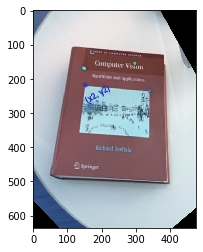

In [5]:
from matplotlib import pyplot as plt
from image_alignment import align_images

# Read reference image
refFilename = "images/book1.jpg"
print("Reading reference image : ", refFilename)
imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

# Read image to be aligned
imFilename = "images/book2.jpg"
print("Reading image to align : ", imFilename);  
img1 = cv2.imread(imFilename, cv2.IMREAD_COLOR)

print("Aligning images ...")
# Registered image will be resotred in imReg. 
# The estimated homography will be stored in h. 
imReg, h = align_images(img1, imReference)

# Write aligned image to disk. 
outFilename = "images/aligned.jpg"
print("Saving aligned image : ", outFilename); 
cv2.imwrite(outFilename, imReg)

# Print estimated homography
print("Estimated homography : \n",  h)
plt.imshow(cv2.imread("images/aligned.jpg", cv2.IMREAD_COLOR))
plt.show()